# BASELINE MODEL

## Loading the dataset

In [145]:
#This block loads the data

%matplotlib inline
import pandas as pd
import numpy as np
import pylab as plt

df = pd.read_excel('data/weatherAUS.xlsx')

df.head(10) #<- shows the first 10 entries

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


## About the data

This data has observations from different cities in Australia. For our baseline model we have decided to work on a single city. Once we have a decent model, we can extend the model to any city and test the generality of the model. For selecting the city, we counted the number of data points for each location and selected the city with most number of data points.

In [146]:
#Get number of data points for each city
df['Location'].value_counts()

Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Ballarat            3028
Launceston          3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cobar               2988
Cairns              2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
NorfolkIsland       2964
Penrith             2964
Newcastle           2955
SalmonGums          2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek       2928


By running the above code, we can see that Canberra has highest number of data points so we will train and test our model with the data of Canberra. Once we have the data of Canberra, we drop the column "Location" from the dataset.

In [147]:
X = df.loc[df['Location'] == 'Canberra']
X=X.drop('Location', axis=1)

## Data cleaning

Our next task is to clean the data. First, we look at the percent data missing in each column. Since we have a very large dataset, we drop a feature if the percentage of missing values in the feature is more than 30%. After dropping the columns, we can remove the rows that have a missing value.

In [148]:
#Find the percentage of missing data in each column
missing_data = X.isna().sum()*100/len(X)
print(missing_data)

#Get columns with missIng data > 30
percentage = 30
drop_columns = [var for var in X.columns if X[var].isna().sum()*100/len(X)>percentage]
print("Columns that should be dropped are:")
print(drop_columns)

Date              0.000000
MinTemp           0.146284
MaxTemp           0.087771
Rainfall          0.468110
Evaporation      46.664716
Sunshine         55.763604
WindGustDir       9.625512
WindGustSpeed     9.566998
WindDir9am       15.681685
WindDir3pm        6.670568
WindSpeed9am      6.670568
WindSpeed3pm      6.524283
Humidity9am       1.784669
Humidity3pm       0.351083
Pressure9am       6.553540
Pressure3pm       6.436513
Cloud9am         31.187829
Cloud3pm         36.688122
Temp9am           0.497367
Temp3pm           0.204798
RainToday         0.468110
RISK_MM           0.000000
RainTomorrow      0.000000
dtype: float64
Columns that should be dropped are:
['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']


In [149]:
#drop columns
for col in (drop_columns):
    if col in X.columns: 
        X=X.drop(drop_columns, axis=1) 

X = X.dropna(how='any',axis=0) #drop rows with missing values
X.shape

(2725, 19)

The cleaned up data without the dropped columns and rows is the following:

In [150]:
X

,Date,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
44351,2007-11-01,8.0,24.3,0.0,NW,30.0,SW,NW,6.0,20.0,68.0,29.0,1019.7,1015.0,14.4,23.6,No,3.6,Yes
44352,2007-11-02,14.0,26.9,3.6,ENE,39.0,E,W,4.0,17.0,80.0,36.0,1012.4,1008.4,17.5,25.7,Yes,3.6,Yes
44353,2007-11-03,13.7,23.4,3.6,NW,85.0,N,NNE,6.0,6.0,82.0,69.0,1009.5,1007.2,15.4,20.2,Yes,39.8,Yes
44354,2007-11-04,13.3,15.5,39.8,NW,54.0,WNW,W,30.0,24.0,62.0,56.0,1005.5,1007.0,13.5,14.1,Yes,2.8,Yes
44355,2007-11-05,7.6,16.1,2.8,SSE,50.0,SSE,ESE,20.0,28.0,68.0,49.0,1018.3,1018.5,11.1,15.4,Yes,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47764,2017-06-21,-2.4,14.7,0.2,WSW,15.0,S,SW,6.0,11.0,99.0,50.0,1029.2,1026.5,0.1,14.5,No,0.0,No
47765,2017-06-22,-0.4,13.9,0.0,NW,37.0,NNW,NNW,2.0,22.0,99.0,56.0,1029.9,1025.6,4.0,13.3,No,0.4,No
47766,2017-06-23,-2.9,13.3,0.4,NNW,35.0,N,NNW,7.0,22.0,99.0,54.0,1022.2,1016.6,0.1,12.4,No,0.0,No
47767,2017-06-24,0.1,14.4,0.0,NW,48.0,N,NW,20.0,28.0,68.0,45.0,1017.5,1016.2,9.1,13.0,No,0.0,No


## Conversion of categorical data

After removal of rows and columns, we are converting the categorical values to dummy values which will add aditional columns to the dataset. For each categorical feature, depending on the number of labels per category, the following code will add those many columns in the dataset. 

In [151]:
def replace_category_values(df,column_name):
    distinct = df[column_name].unique()
    for i in range(len(distinct)):
        df[column_name+distinct[i]] = [1 if x == distinct[i] else 0 for x in df[column_name]]
    return df

In [152]:
categorical = [var for var in X.columns if X[var].dtype=='O']
print(categorical)

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [153]:
categorical = [var for var in X.columns if X[var].dtype=='O']

if 'RainToday' in categorical:
    X['RainToday'] = [1 if x == 'Yes' else 0 for x in X['RainToday']]

if 'RainTomorrow' in categorical:
    X['RainTomorrow'] = [1 if x == 'Yes' else 0 for x in X['RainTomorrow']]

In [154]:
categorical = [var for var in X.columns if X[var].dtype=='O']

for i in range(len(categorical)):
    X=replace_category_values(X,categorical[i])
    
X=X.drop(categorical, axis=1) #drop columns
    

In [155]:
categorical = [var for var in X.columns if X[var].dtype=='O']

The dataset after addition of categorical data is the following:

In [156]:
X 

,Date,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,WindDir3pmWSW,WindDir3pmNE,WindDir3pmNNW,WindDir3pmSE,WindDir3pmS,WindDir3pmSW,WindDir3pmWNW,WindDir3pmN,WindDir3pmSSW,WindDir3pmSSE
44351,2007-11-01,8.0,24.3,0.0,30.0,6.0,20.0,68.0,29.0,1019.7,...,0,0,0,0,0,0,0,0,0,0
44352,2007-11-02,14.0,26.9,3.6,39.0,4.0,17.0,80.0,36.0,1012.4,...,0,0,0,0,0,0,0,0,0,0
44353,2007-11-03,13.7,23.4,3.6,85.0,6.0,6.0,82.0,69.0,1009.5,...,0,0,0,0,0,0,0,0,0,0
44354,2007-11-04,13.3,15.5,39.8,54.0,30.0,24.0,62.0,56.0,1005.5,...,0,0,0,0,0,0,0,0,0,0
44355,2007-11-05,7.6,16.1,2.8,50.0,20.0,28.0,68.0,49.0,1018.3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47764,2017-06-21,-2.4,14.7,0.2,15.0,6.0,11.0,99.0,50.0,1029.2,...,0,0,0,0,0,1,0,0,0,0
47765,2017-06-22,-0.4,13.9,0.0,37.0,2.0,22.0,99.0,56.0,1029.9,...,0,0,1,0,0,0,0,0,0,0
47766,2017-06-23,-2.9,13.3,0.4,35.0,7.0,22.0,99.0,54.0,1022.2,...,0,0,1,0,0,0,0,0,0,0
47767,2017-06-24,0.1,14.4,0.0,48.0,20.0,28.0,68.0,45.0,1017.5,...,0,0,0,0,0,0,0,0,0,0


The dataset we have now is a 2725 x 64 matrix in which we will make the "Date" column an index. The column "RISK_MM" will be our output (y). Further, we will drop "RISK_MM" from the feature matrix.

In [178]:
X_datetime = X.set_index('Date')
X_datetime2 = X_datetime['2007':'2016']
#print(X_datetime.index)

#y = y.dropna(how='any',axis=0)

y = X_datetime2['RISK_MM']
print(y.shape)
y_new = y[y.notna()]
print(y_new.shape)
y_new_mean = y_new.resample('M').sum()
#y_2 = y_new_mean['2014':'2017']
y_final = y_new_mean.div(30)


(2574,)
(2574,)


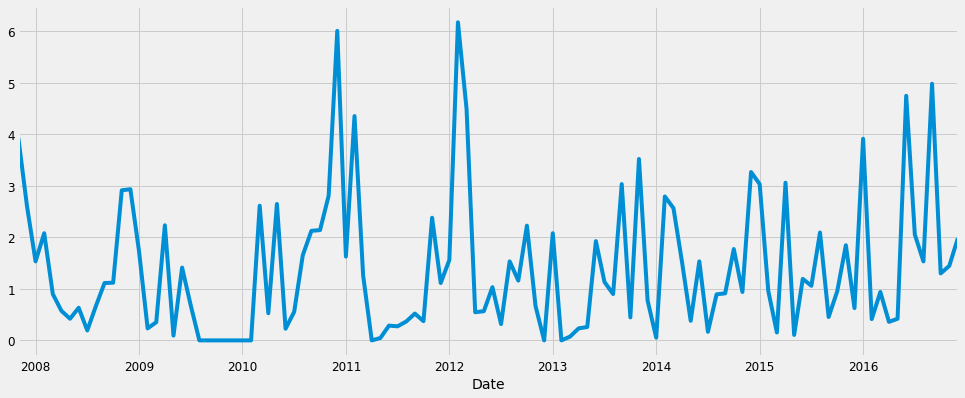

(110,)

In [179]:
#y_new.dropna(how='any',axis=0)
#y_new = X_datetime['RISK_MM'].fillna(0)
y_final.plot(figsize=(15, 6))
plt.show()
y_final.shape


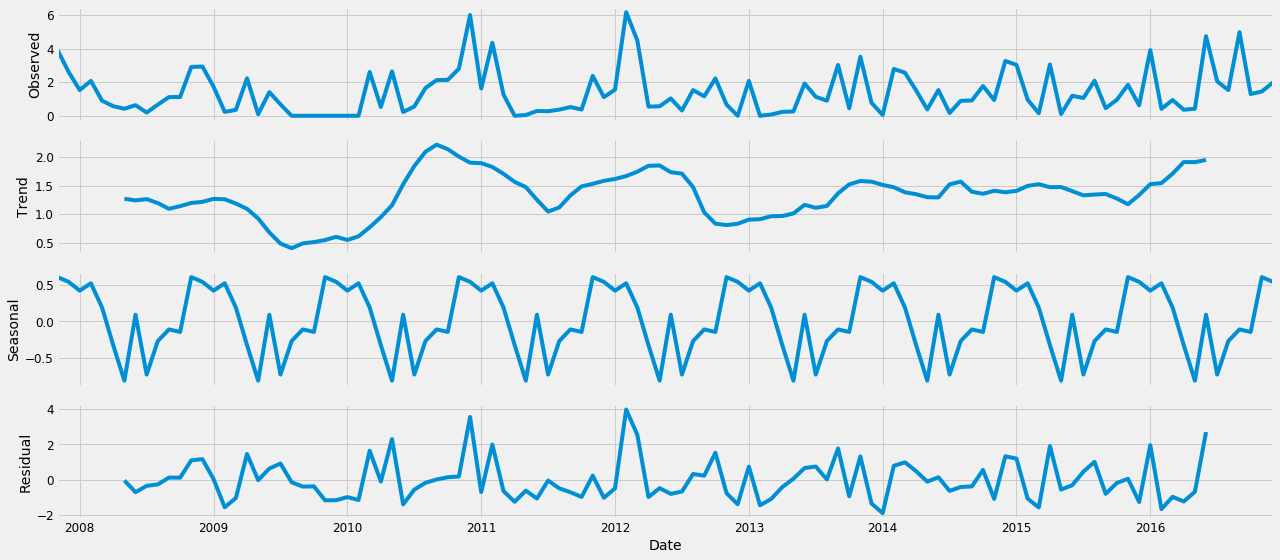

In [180]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
from pylab import rcParams
#help(sm.tsa.seasonal_decompose)

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y_final, model='additive', filt=None, freq=None)
fig = decomposition.plot()
plt.show()


In [181]:
import itertools
#ARIMA 
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))



Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [182]:
import warnings
warnings.filterwarnings("ignore")

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:16675.413635512326
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:16540.44227488078
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:18091.604825268263
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:16332.42077578763
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:16543.611277963406
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:16443.002656051605
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:17302.397920816242
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:16325.137099425188
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:16547.29670235894
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:16420.26117832407
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:18021.771415309377
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:16259.70483935219
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:16430.580680161533
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:16421.4863493495
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:17237.988332059085
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:16252.95741572907
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:17749.37973943371
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:17624.527157914203
A

In [183]:
mod = sm.tsa.statespace.SARIMAX(y_final,
                                order=(1, 0, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])



                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5103      0.645      0.791      0.429      -0.754       1.774
ma.L1         -0.3801      0.678     -0.561      0.575      -1.708       0.948
ar.S.L12      -0.3080      0.140     -2.202      0.028      -0.582      -0.034
ma.S.L12      -0.7418      0.213     -3.490      0.000      -1.158      -0.325
sigma2         2.0587      0.330      6.230      0.000       1.411       2.706


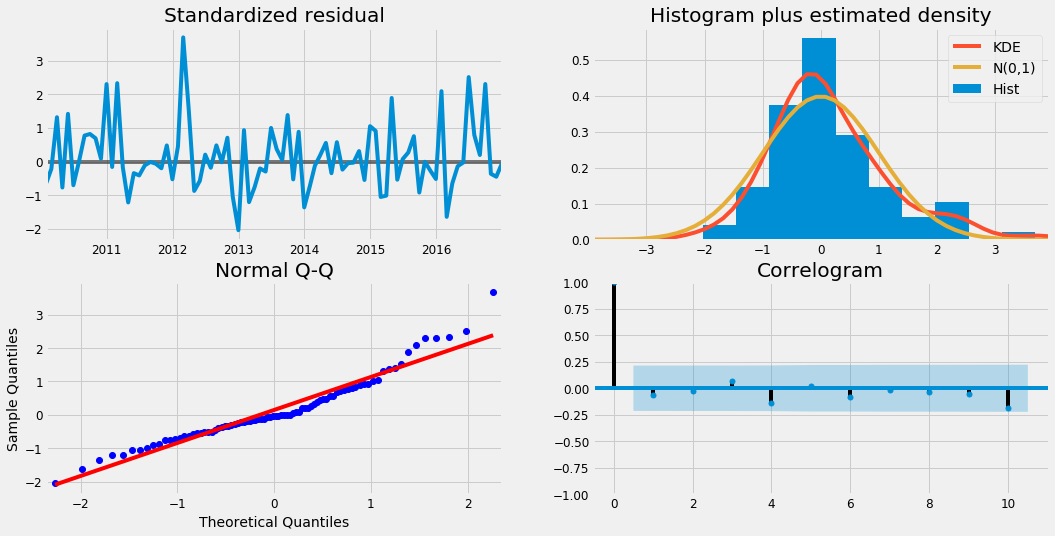

Date
2007-11-30    3.933333
2007-12-31    2.613333
2008-01-31    1.533333
2008-02-29    2.080000
2008-03-31    0.900000
                ...   
2016-08-31    1.533333
2016-09-30    4.980000
2016-10-31    1.300000
2016-11-30    1.446667
2016-12-31    1.986667
Freq: M, Name: RISK_MM, Length: 110, dtype: float64


In [193]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()
print(y_final)

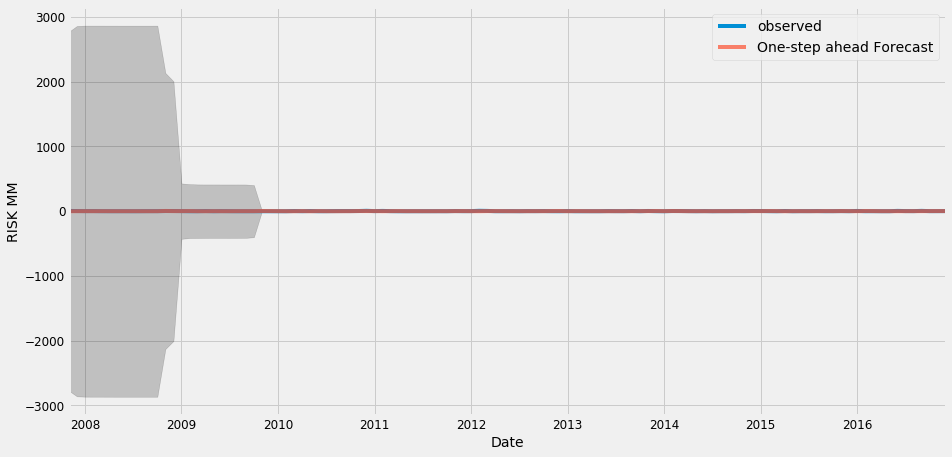

In [194]:
pred = results.get_prediction(start=pd.to_datetime('2007-11-30'), dynamic=False)
pred_ci = pred.conf_int()
ax = y_final.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('RISK MM')
plt.legend()
plt.show()

Since different features have different dimensions, we will scale the data. For scaling, we are following the standard scaling approach. 

In [14]:
X_scaled = (X_values - X_values.mean(axis=0))/X_values.std(axis=0)
print("Minimum: {}, Maximum: {}".format(X_scaled.min(), X_scaled.max()))
print("Minimum scaled: {}, Maximum scaled: {}".format(X_scaled.min(), X_scaled.max()))

Minimum: -4.2997308649407024, Maximum: 14.233850236344153
Minimum scaled: -4.2997308649407024, Maximum scaled: 14.233850236344153


We can see that after standard scaling, the difference between minimum and maximum scaled values decrease.

## Selection of validation set

For validation set, we select the dataset only for the year 2017. We store this data in X_val and keep it aside for validation of the model.

In [15]:
X_val = X_scaled[-151:-1]
X_scaled= X_scaled[0:(len(X_scaled)-150)]  

y_val = y[-151:-1]
y = y[0:(len(y)-150)]  

In [16]:
from sklearn.utils import shuffle
#subsets = 3
X_main, y_main = shuffle(X_scaled, y)

## Cross Validation

### Hold-out cross validation

We use train-test-split to split the data into 70% training data and 30% testing data and perform linear regression to train the model. Further, we predict for the test dataset.

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_main, y_main, test_size=0.3)

In [18]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() #create a linear regression model instance
model.fit(X_train, y_train) #fit the model
r2_training = model.score(X_train, y_train) #get the "score", which is equivalent to r^2

yhat = model.predict(X_test) #create the model prediction
r2_test = model.score(X_test, y_test)
print("r^2_training = {}".format(r2_training))
print("r^2_testing = {}".format(r2_test))


r^2_training = 0.4490386447456879
r^2_testing = 0.3880929622928757


### Parity plot

We can check the accuracy of our model using parity plot by plotting actual and predicted values for training and testing dataset.

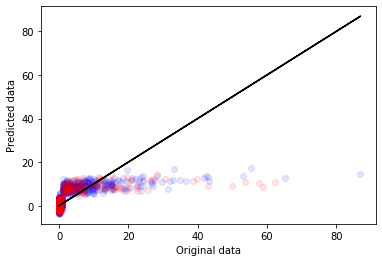

In [19]:
import pylab as plt

yhat_train = model.predict(X_train)
plt.scatter(y_train, yhat_train,alpha=0.1, c='b')
plt.scatter(y_test, yhat,alpha=0.1, c='r')
plt.xlabel('Original data')
plt.ylabel('Predicted data')

plt.plot(y_main,y_main, '-k');

Now, we will test it on the validation dataset. 

In [20]:
X_val, y_val = shuffle(X_val, y_val)

In [21]:
yhat_val = model.predict(X_val)

In [22]:
r2_val = model.score(X_val, y_val)
print("r^2 validation = {}".format(r2_val))

r^2 validation = 0.21665649928356445


Hence, the $r^{2}$ value for the validation dataset is close to 0.13.

We can also look at the parity plot for the validation dataset.

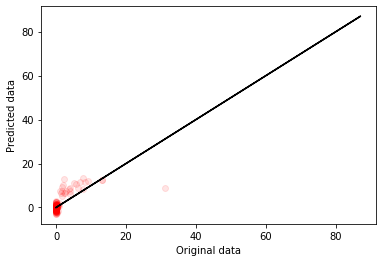

In [23]:
#fig = plt.subplots()

#ax.scatter(y_train, yhat_train,alpha=0.1, c='b')
plt.scatter(y_val, yhat_val,alpha=0.1, c='r')
plt.xlabel('Original data')
plt.ylabel('Predicted data')
plt.plot(y_main,y_main, '-k');


### K-fold cross validation

Now, we will do 5-fold cross validation on our dataset and plot the parity plot to check the accuracy of the model.

In [24]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle = True)

r2_test = []

r^2 training = 0.457945611351684
r^2 testing = 0.33978803847257666
r^2 training = 0.43794832286272994
r^2 testing = 0.4133857851228826
r^2 training = 0.43823183327289805
r^2 testing = 0.4097580329656956
r^2 training = 0.44851312852887537
r^2 testing = 0.28507127925211284
r^2 training = 0.4339524854438498
r^2 testing = 0.43820472896817014
[0.33978803847257666, 0.4133857851228826, 0.4097580329656956, 0.28507127925211284, 0.43820472896817014]


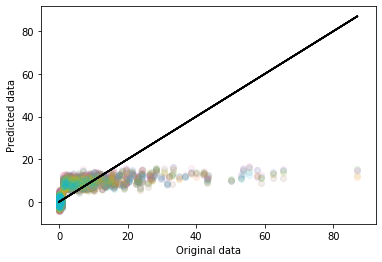

In [25]:
#fig, ax = plt.subplots()

for train_index, test_index in kf.split(X_main):
    x_train, x_test = X_main[train_index], X_main[test_index]
    y_train, y_test = y_main[train_index], y_main[test_index]
    model = LinearRegression()
    model.fit(x_train, y_train) #fit the model
    r2_train = model.score(x_train, y_train) #get the "score", which is equivalent to r^2
    print('r^2 training = {}'.format(r2_train))

    #X_test = rbf(x_train, x_test=x_test, gamma=gamma)

    yhat = model.predict(x_test) #create the model prediction

    r2 = model.score(x_test, y_test) #get the "score", which is equivalent to r^2
    print('r^2 testing = {}'.format(r2))
    r2_test.append(r2)
    yhat_train = model.predict(x_train)
    plt.scatter(y_train, yhat_train,alpha=0.1)
    plt.scatter(y_test, yhat,alpha=0.1)
    plt.xlabel('Original data')
    plt.ylabel('Predicted data')
    plt.plot(y_main,y_main, '-k')
    #ax.plot(x_test, yhat, marker = 'o', ls = 'none')
    
print(r2_test)

Now, we check the parity plot for validation dataset.

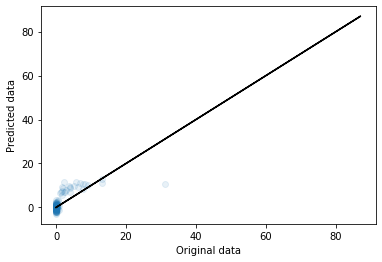

In [26]:
#fig, ax = plt.subplots()

yhat_val = model.predict(X_val)
#ax.scatter(y_train, yhat_train,alpha=0.1)
plt.scatter(y_val, yhat_val,alpha=0.1)
plt.plot(y_main,y_main, '-k')
plt.xlabel('Original data')
plt.ylabel('Predicted data')
#r2_val = model.score(yhat_vall, y_vall)
r2_val = model.score(X_val, y_val)


In [27]:
print('r^2 validation = {}'.format(r2_val))

r^2 validation = 0.2971050850082042


For 5-fold cross-validation, the model gives $r^{2}$ of 0.15 which is worse than the $r^{2}$ for the testing dataset. In our baseline model, we have not considered the correlation among the features and between features and the output. Also, we are not adding any non-linearity to our model by transforming the features into a kernel. For our improved model, we can first consider transforming features to an rbf-kernel. We can improvise it further by principal component analysis in which we find out the principal components and build our model using those features.

## Correlation matrix for features

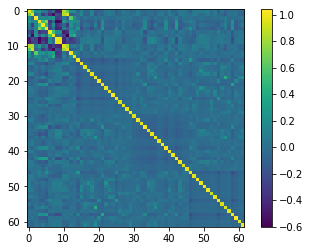

In [28]:
covar = np.cov(X_scaled.T) #whether there is or not linear dependence between the features
fig,ax = plt.subplots()
c = ax.imshow(covar)
fig.colorbar(c); #40*40 (number of features by number of features)